<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-1-Build/blob/master/Khislat_Zhuraeva_Medical_Cost_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()  #source https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset

Saving sample-insurance-claim-prediction-dataset.zip to sample-insurance-claim-prediction-dataset.zip


In [0]:
!unzip sample-insurance-claim-prediction-dataset.zip

Archive:  sample-insurance-claim-prediction-dataset.zip
  inflating: insurance2.csv          
  inflating: insurance3r2.csv        


1.  **AGE:** Age of a primary beneficiary 
2.  **SEX:** Gender 
3. **BMI:** Body mass index
4. **CHILDREN:** The number of children covered by health insurance / number of dependents
5. **SMOKER:** Yes or No
6. **REGION:** The beneficiary's residential area in the US: northeast = 0,northwest = 1, southeast = 2, southwest = 3 
7. **CHARGES:** Individual medical cost billed by insurance 






In [0]:
#importing insurance dataset 
import pandas as pd
insurance1_df = pd.read_csv('insurance3r2.csv')
insurance1_df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [0]:
insurance1_df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [0]:
insurance1_df.shape #Let's take a look at the shape

(1338, 9)

In [0]:
insurance1_df.isnull().sum() #No NaNs 

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [0]:
insurance1_df.columns 

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [0]:
insurance_df = insurance1_df.drop(['insuranceclaim'], axis=1)
insurance_df.head() #dropping columns we won't need 

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [0]:
insurance_df.head() #New dataset looks like this

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [0]:
insurance_df.shape

(1338, 8)

In [0]:
insurance_df.to_csv(r'C:\Users\Khisl\Documents\Medical_Cost_Project.csv')
print(insurance_df)
#Converting it into a csv format file

      age  sex     bmi  steps  children  smoker  region      charges
0      19    0  27.900   3009         0       1       3  16884.92400
1      18    1  33.770   3008         1       0       2   1725.55230
2      28    1  33.000   3009         3       0       2   4449.46200
3      33    1  22.705  10009         0       0       1  21984.47061
4      32    1  28.880   8010         0       0       1   3866.85520
...   ...  ...     ...    ...       ...     ...     ...          ...
1333   50    1  30.970   4008         3       0       1  10600.54830
1334   18    0  31.920   3003         0       0       0   2205.98080
1335   18    0  36.850   3008         0       0       2   1629.83350
1336   21    0  25.800   8009         0       0       3   2007.94500
1337   61    0  29.070   8008         0       1       1  29141.36030

[1338 rows x 8 columns]


In [0]:
insurance_df['age'].sort_values(ascending=True).unique() #How many different unique ages we have 


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

The visualization Age - Charges shows that the older a beneficiary is the higher the cost

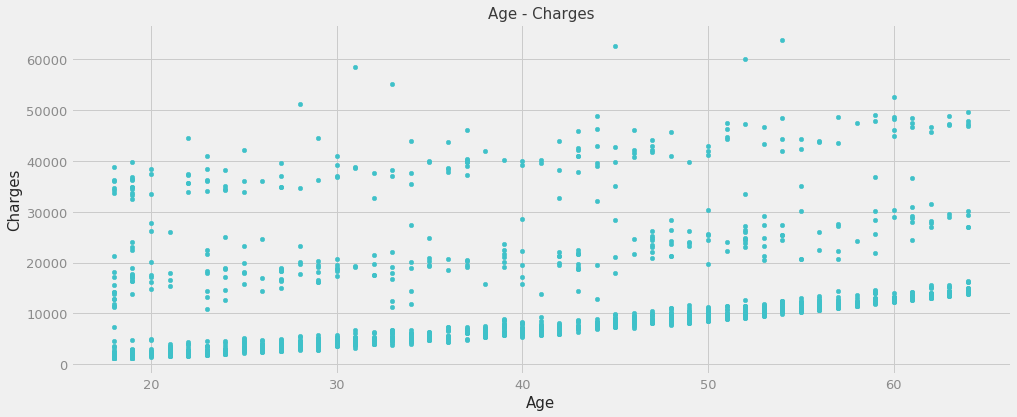

In [0]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 5.2))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.plot(ax=ax,kind= 'scatter', x = 'age', y = 'charges', figsize=(15,6), color='#3FC1C9');
plt.xlabel('Age', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontname="Calibri", fontsize=15)

#Set xticks label
plt.xticks(fontsize=13, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=13, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Age - Charges', alpha=0.9, fontsize=15);
plt.show()


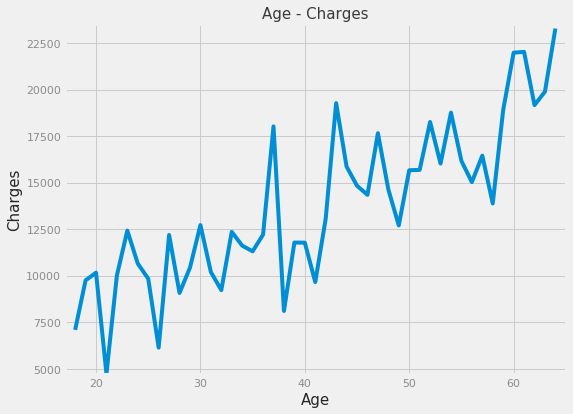

In [0]:
#Here is another visualization of Age - Charges

fig, ax = plt.subplots(figsize=(8, 7))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.groupby('age')['charges'].mean().plot(figsize=(8,6))
plt.xlabel('Age', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontname="Calibri", fontsize=15)
ax.set_xlim(17, 65)
ax.set_ylim(4700, 23500)
#Set xticks label
plt.xticks(fontsize=11, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=11, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Age - Charges', alpha=0.9, fontsize=15);
plt.show()

#The visualization shows that the older a beneficiary is the higher the cost

The visualization Sex - Charges shows that the costs are slightly higher for men than women but there difference is not significant 

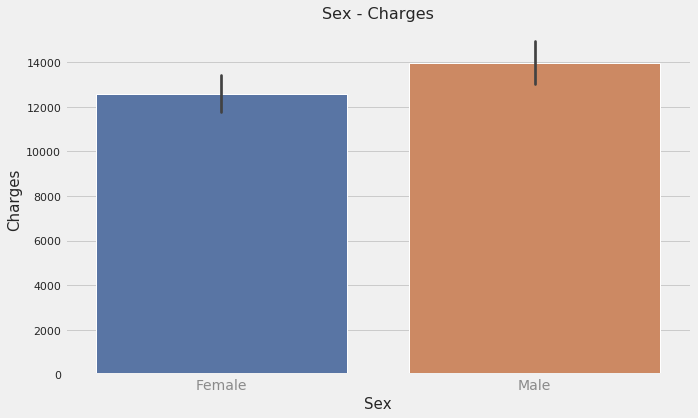

In [0]:
import seaborn as sns
#Sex - Charges

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid") 
ax = sns.barplot(x="sex", y="charges", data=insurance_df)
#set title
ax.set_title('Sex - Charges', fontsize=16);
#set x and y labels
plt.xlabel('Sex', fontweight='light', fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontsize=15)
#set xticklabels
ax.set_xticklabels(('Female', 'Male'), weight='ultralight', fontsize=14, alpha=0.5);


The visualization Steps - Charges shows that the more steps a beneficiary takes, the less insurance costs are

In [0]:
insurance_df.sort_values(by='steps', ascending=False) # Range of steps 3000-10010

,age,sex,bmi,steps,children,smoker,region,charges
468,28,0,24.32,10010,1,0,0,23288.9284
1023,18,1,23.32,10010,1,0,2,1711.0268
802,21,1,22.30,10010,1,0,3,2103.0800
119,37,0,23.37,10010,2,0,1,6686.4313
1286,28,0,17.29,10010,0,0,0,3732.6251
...,...,...,...,...,...,...,...,...
298,31,1,34.39,3000,3,1,1,38746.3551
144,30,1,28.69,3000,3,1,1,20745.9891
904,60,0,35.10,3000,0,0,3,12644.5890
750,37,0,26.40,3000,0,1,2,19539.2430


In [0]:
stepsbins = [0, 3000, 5328, 10010]
stepslabels = ['lessthanavg', 'avg', 'greaterthanavg']
insurance_df['steps']= pd.cut(insurance_df['steps'], bins=stepsbins, labels=stepslabels)
myresults = insurance_df['steps'].value_counts().sort_index()


In [0]:
steps_charges_df = insurance_df[['steps', 'charges']]
steps_charges_df

,steps,charges
0,avg,16884.92400
1,avg,1725.55230
2,avg,4449.46200
3,greaterthanavg,21984.47061
4,greaterthanavg,3866.85520
...,...,...
1333,avg,10600.54830
1334,avg,2205.98080
1335,avg,1629.83350
1336,greaterthanavg,2007.94500


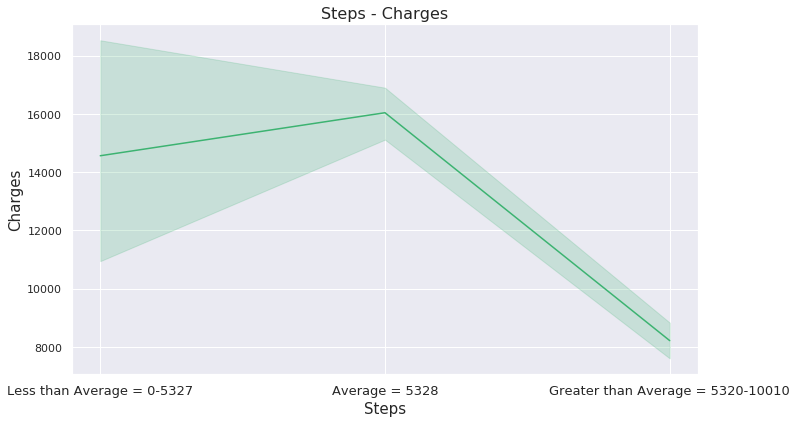

In [304]:
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid") 
#line plot
ax = sns.lineplot(x='steps', y='charges', data=steps_charges_df, markers=["o", "o"], color='mediumseagreen')
#Set title
ax.set_title('Steps - Charges',fontsize=16);
#set x and y labels
plt.xlabel('Steps', fontweight='light', fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontsize=15)
#Set xticklabels
ax.set_xticklabels(['Less than Average = 0-5327','Average = 5328', 'Greater than Average = 5320-10010'], fontsize = 13, rotation=0);


The visualization Number of dependents - Charges shows that the cost goes up for up to 3 dependents

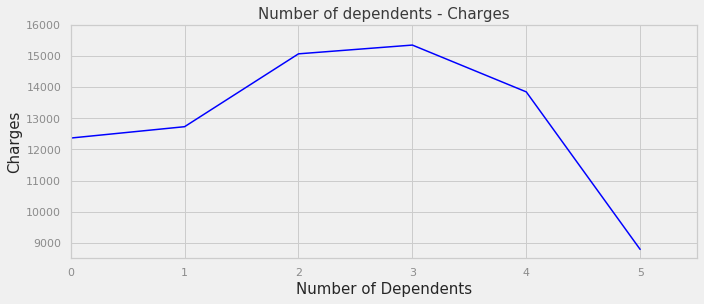

In [305]:
#Children - Charges

fig, ax = plt.subplots(figsize=(8, 7))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.groupby('children')['charges'].mean().plot(figsize=(10,4), color='blue');
plt.xlabel('Number of Dependents', fontweight='light', fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontsize=15)
#Set xlim and ylim
ax.set_xlim(0,5.5)
ax.set_ylim(8500, 16000)
#Set xticks label
plt.xticks(fontsize=11, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=11, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Number of dependents - Charges', alpha=0.9, fontsize=15);
plt.show()

#https://www.health.ny.gov/health_care/child_health_plus/eligibility_and_cost.htm states that "for larger families, the monthly fee is capped at three children"


Based on the Region - Charges visualization, the prices are higher for SouthEastern states of the USA rather than the rest of the states 

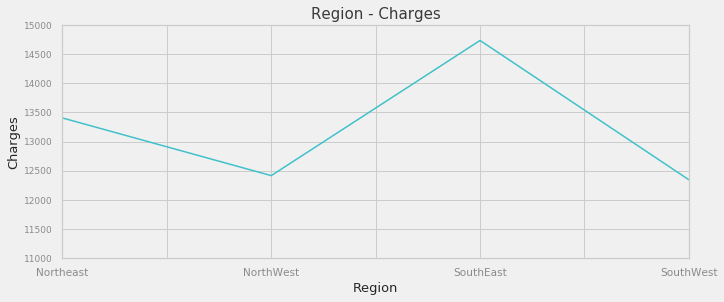

In [273]:
#Region - Charges

fig, ax = plt.subplots(figsize=(8, 7))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.groupby('region')['charges'].mean().plot(figsize=(10,4), color = '#3FC1C9');
#set x and y labels
plt.xlabel('Region', fontweight='light', fontsize=13)
plt.ylabel('Charges', fontweight = 'light', fontsize=13)
#Set xlim and ylim
ax.set_xlim(0,3)
ax.set_ylim(11000, 15000)
#Set xticks label
plt.xticks(fontsize=9, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=9, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Region - Charges', alpha=0.9, fontsize=15);
#Set xticks label
ax.set_xticklabels(('Northeast', "", 'NorthWest', "", 'SouthEast', "", 'SouthWest'), weight='ultralight', fontsize=10.5, alpha=0.5);
plt.show()

The visualization BMI - Charges shows that the higher the BMI of a beneficiary the higher insurance costs are. In other words there is a positive correlation 

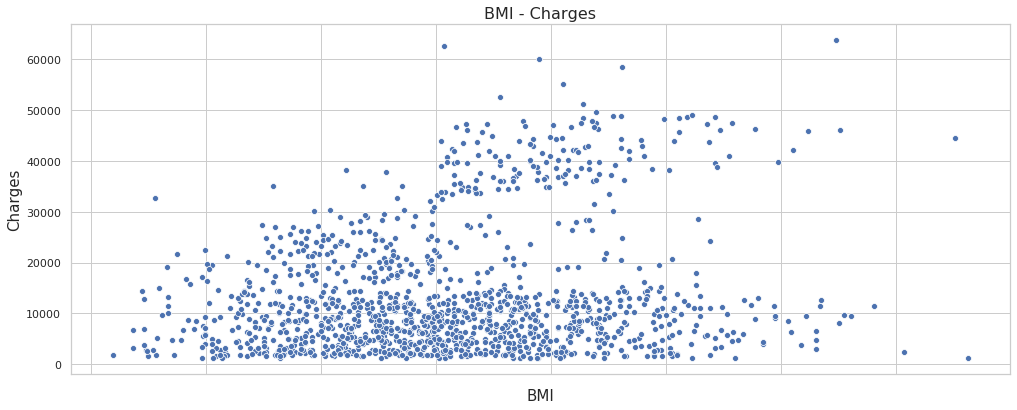

In [274]:
#BMI - Charges

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(style="whitegrid") 
ax = sns.scatterplot(x="bmi", y="charges", data=insurance_df)
#set title
ax.set_title('BMI - Charges', fontsize = 16)
#set x and y labels
plt.xlabel('BMI', fontweight='light', fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontsize=15)
#set xticklabels
ax.set_xticklabels("");


The visualization Smoker - Charges shows that smokers are charged a higher cost than non smokers 


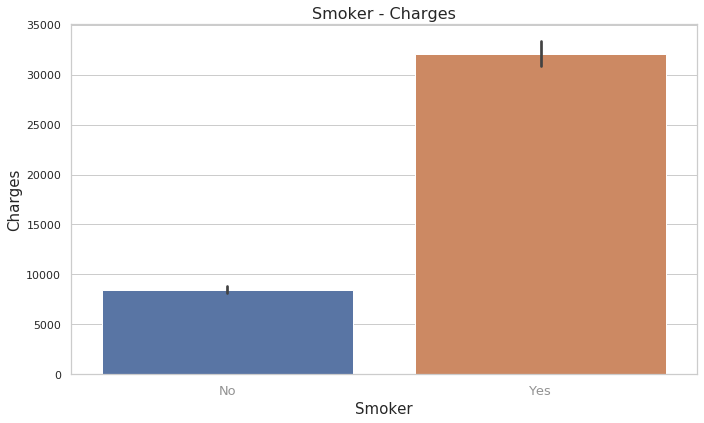

In [277]:
#Smoker - Charges

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid") 
ax = sns.barplot(x="smoker", y="charges", data=insurance_df)
#set title
ax.set_title('Smoker - Charges', fontsize=16);
#set x and y labels
plt.xlabel('Smoker', fontweight='light', fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontsize=15)
#set xticklabels
ax.set_xticklabels(('No', 'Yes'), weight='ultralight', fontsize=13, alpha=0.5)
plt.show()


In [278]:
insurance_df['bmi'].value_counts()

32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

In [279]:
#crosstab of age and sex to see if the number of men and women would affect our results 
age_sex = pd.crosstab(insurance_df['age'], insurance_df['sex'])
age_sex.head()

sex,0,1
age,,
18,33,36
19,33,35
20,14,15
21,13,15
22,13,15


In [280]:
age_teens = insurance_df[insurance_df['age']<=19]
age_teens.head()

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,avg,0,1,3,16884.92400
1,18,1,33.770,avg,1,0,2,1725.55230
15,19,1,24.600,greaterthanavg,1,0,3,1837.23700
22,18,1,34.100,avg,0,0,2,1137.01100
31,18,0,26.315,greaterthanavg,0,0,0,2198.18985


In [281]:
#crosstab of teeagers and sex 
age_teens_sex = pd.crosstab(age_teens['age'], age_teens['sex'])
age_teens_sex.head()

sex,0,1
age,,
18,33,36
19,33,35


In [282]:
age_twenties = insurance_df[((insurance_df['age']>19) & (insurance_df['age']<30))]
age_twenties.head()

,age,sex,bmi,steps,children,smoker,region,charges
2,28,1,33.000,avg,3,0,2,4449.46200
10,25,1,26.220,greaterthanavg,0,0,0,2721.32080
12,23,1,34.400,avg,0,0,3,1826.84300
14,27,1,42.130,avg,0,1,2,39611.75770
17,23,1,23.845,greaterthanavg,0,0,0,2395.17155


In [283]:
#crosstab of age twenties and sex 
age_twenties_sex = pd.crosstab(age_twenties['age'], age_twenties['sex'])
age_twenties_sex.head()

sex,0,1
age,,
20,14,15
21,13,15
22,13,15
23,14,14
24,14,14


In [284]:
age_thirties = insurance_df[((insurance_df['age']>29) & (insurance_df['age']<40))]
age_thirties.head()

,age,sex,bmi,steps,children,smoker,region,charges
3,33,1,22.705,greaterthanavg,0,0,1,21984.47061
4,32,1,28.880,greaterthanavg,0,0,1,3866.85520
5,31,0,25.740,greaterthanavg,0,0,2,3756.62160
7,37,0,27.740,greaterthanavg,3,0,1,7281.50560
8,37,1,29.830,greaterthanavg,2,0,0,6406.41070


In [285]:
#crosstab of age thirties and sex 
age_thirties_sex = pd.crosstab(age_thirties['age'], age_thirties['sex'])
age_thirties_sex.head()

sex,0,1
age,,
30,13,14
31,13,14
32,13,13
33,13,13
34,13,13


In [286]:
age_fourties = insurance_df[((insurance_df['age']>39) & (insurance_df['age']<50))]
age_fourties.head()

,age,sex,bmi,steps,children,smoker,region,charges
6,46,0,33.44,avg,1,0,2,8240.5896
42,41,1,21.78,greaterthanavg,1,0,2,6272.4772
52,48,1,28.00,avg,1,1,3,23568.2720
54,40,0,28.69,greaterthanavg,3,0,1,8059.6791
60,43,1,27.36,greaterthanavg,3,0,0,8606.2174


In [287]:
#crosstab of age fourties and sex 
age_fourties_sex = pd.crosstab(age_fourties['age'], age_fourties['sex'])
age_fourties_sex.head()

sex,0,1
age,,
40,13,14
41,13,14
42,13,14
43,14,13
44,14,13


In [288]:
age_fifties = insurance_df[((insurance_df['age']>49) & (insurance_df['age']<60))]
age_fifties.head()

,age,sex,bmi,steps,children,smoker,region,charges
13,56,0,39.820,avg,0,0,2,11090.71780
16,52,0,30.780,avg,1,0,0,10797.33620
18,56,1,40.300,avg,0,0,3,10602.38500
25,59,0,27.720,greaterthanavg,3,0,2,14001.13380
27,55,0,32.775,avg,2,0,1,12268.63225


In [289]:
#crosstab of age fifties and sex 
age_fifties_sex = pd.crosstab(age_fifties['age'], age_fifties['sex'])
age_fifties_sex.head()

sex,0,1
age,,
50,14,15
51,15,14
52,15,14
53,14,14
54,14,14


In [290]:
age_sixties = insurance_df[((insurance_df['age']>59) & (insurance_df['age']<70))]
age_sixties.head()

,age,sex,bmi,steps,children,smoker,region,charges
9,60,0,25.840,avg,0,0,1,28923.13692
11,62,0,26.290,avg,0,1,2,27808.72510
20,60,0,36.005,avg,0,0,0,13228.84695
26,63,0,23.085,avg,0,0,0,14451.83515
33,63,1,28.310,avg,0,0,1,13770.09790


In [291]:
#crosstab of age sixties and sex 
age_sixties_sex = pd.crosstab(age_sixties['age'], age_sixties['sex'])
age_sixties_sex.head()

sex,0,1
age,,
60,11,12
61,12,11
62,12,11
63,12,11
64,11,11


We have approximately the same number of men and women meaning that sex will not affect much the cost of the insurance. However, we have more of young people in our sample that older people

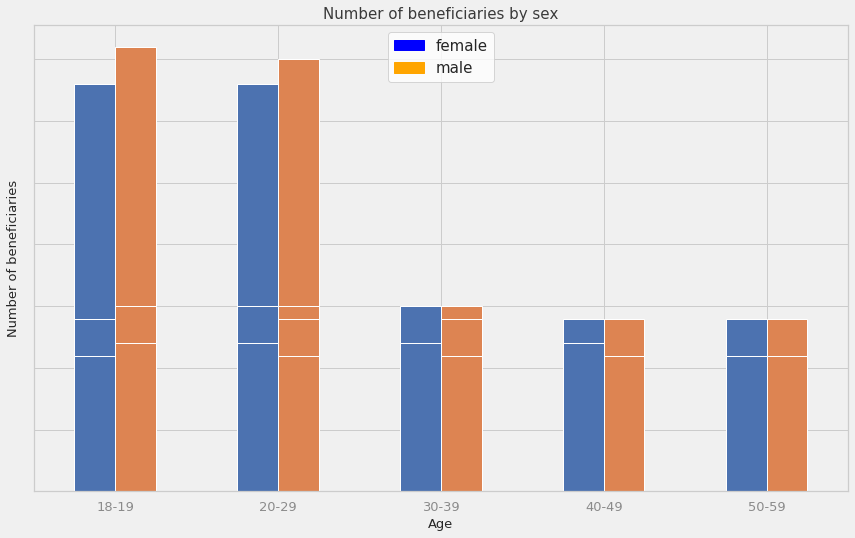

In [292]:
#Plottig the Sex - Age crosstab
fig, ax = plt.subplots(figsize=(15,10))
fig.patch.set(facecolor='#F0F0F0')
# Set the bar chart
ax.set(facecolor='#F0F0F0') #figure background
ax = age_teens_sex.plot(ax=ax,kind='bar', figsize=(13,8));
ax = age_twenties_sex.plot(ax=ax,kind='bar', figsize=(13,8));
ax = age_thirties_sex.plot(ax=ax,kind='bar', figsize=(13,8));
ax = age_fourties_sex.plot(ax=ax,kind='bar', figsize=(13,8));
ax = age_fifties_sex.plot(ax=ax,kind='bar', figsize=(13,8));
ax = age_sixties_sex.plot(ax=ax,kind='bar', figsize=(13,8));
plt.xlabel('Age', fontweight='light', fontsize=13)
plt.ylabel('Number of beneficiaries', fontweight = 'light', fontsize=13)
import matplotlib.patches as mpatches
female_label = mpatches.Patch(color='blue', label='female')
male_label = mpatches.Patch(color='orange', label='male')
plt.legend(handles=[female_label, male_label], loc = 'upper center', prop={"size":15})
#set the title
ax.set_title('Number of beneficiaries by sex', alpha=0.9, fontsize=15);
#set yticklabels
ax.set_yticklabels((""))
#set xticklabels
ax.set_xticklabels(('18-19', '20-29', '30-39', '40-49', '50-59', '60-69'), weight='ultralight', fontsize=13, alpha=0.5, rotation=0)
plt.show()


In [293]:
#find the correlation between age and charges 

age_charges = insurance_df[['age', 'charges']]
age_charges.corr()


#there is a positive correlation between age and charges but it is not big 



,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [294]:
#sex and charges 
sex_charges = insurance_df[['sex', 'charges']]
sex_charges.corr()

#There is a negative small negative correlation between sex and charges meaning that 
# gender does not affect the cost a beneficiary pays 


,sex,charges
sex,1.000000,0.057292
charges,0.057292,1.000000


In [295]:
#bmi and charges 
bmi_charges = insurance_df[['bmi', 'charges']]
bmi_charges.corr()
#there is a positive correlation between bmi and charges but it is not big 


,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [296]:
#number of children and charges
dependents_charges = insurance_df[['children', 'charges']]
dependents_charges.corr()

#there is a positive correlation between number of dependents and charges but it is not big 


,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [297]:
#steps and charges 
steps_charges = insurance_df[['steps', 'charges']]
steps_charges.corr()

#There is a negative small negative correlation between steps and charges meaning that 
#number of steps do not really affect the cost a beneficiary pays

,charges
charges,1.0


In [298]:
#smoker and charges
smoker_charges = insurance_df[['smoker', 'charges']]
smoker_charges.corr()
#there is a positive correlation between number of smoker and charges, which is pretty high 


,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


In [299]:
region_charges = insurance_df[['region', 'charges']]
region_charges.corr()
#negative correlation 


,region,charges
region,1.000000,-0.006208
charges,-0.006208,1.000000


In [300]:
#correlation matrix
corr_matrix = insurance_df.corr()
corr_matrix


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


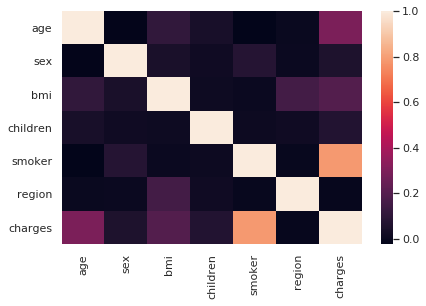

In [301]:
import seaborn as sns
sns.heatmap(insurance_df.corr());